 **Mostafa Hasanen Ahmed**

 E-mail: mostafahasanen999@gmail.com
 
 1. Import dataset
 2. Data preparation
        -Remove duplicates
        -Fill null values
        -Drop unnecessary Columns
 3. Data Visualisations: Using plots to answers this questions
        -Q1. Which drink has the highest calories from the dataset?
        -Q2. Highest Sugar Drink ?

In [1]:
#1 Importing Dataset from current folder of py
import pandas as pd

Menu = pd.read_csv("drinkMenu.csv")
Menu.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


**2-EDA (Exploratory Data Analysis) and Data Preparation**

In [2]:
Menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

from shown info:

Some names start with extra space

Caffeine has Null value

Categorical: Beverage_category, Beverage, Beverage_prep, Total Fat (g), Vitamin A (% DV), Vitamin C (% DV), Calcium (% DV), Iron (% DV), Caffeine (mg)

Numerical: Calories, Trans Fat (g), Saturated Fat (g), Sodium (mg), Total Carbohydrates (g), Cholesterol (mg), Dietary Fibre (g), Sugars (g), Protein (g)

*DV: Daily Value

In [3]:
# Adjust columns names
Menu.keys()

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [4]:
# Rename columns with extra spaces
Menu.rename(columns = {' Total Fat (g)': 'Total Fat (g)','Trans Fat (g) ': 'Trans Fat (g)', ' Sodium (mg)':'Sodium (mg)', ' Total Carbohydrates (g) ':'Total Carbohydrates (g)',' Dietary Fibre (g)':'Dietary Fibre (g)',' Sugars (g)':'Sugars (g)',' Protein (g) ':'Protein (g)','Vitamin A (% DV) ':'Vitamin A (% DV)', ' Calcium (% DV) ':'Calcium (% DV)', 'Iron (% DV) ':'Iron (% DV)'}, inplace=True)

Categorical Columns:

In [5]:
# explore categorical: Beverage_category
Menu["Beverage_category"].value_counts(dropna=False)

Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                18
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
Name: Beverage_category, dtype: int64

In [6]:
# explore categorical: Beverage
Menu["Beverage"].unique()

array(['Brewed Coffee', 'Caffè Latte',
       'Caffè Mocha (Without Whipped Cream)',
       'Vanilla Latte (Or Other Flavoured Latte)', 'Caffè Americano',
       'Cappuccino', 'Espresso', 'Skinny Latte (Any Flavour)',
       'Caramel Macchiato',
       'White Chocolate Mocha (Without Whipped Cream)',
       'Hot Chocolate (Without Whipped Cream)',
       'Caramel Apple Spice (Without Whipped Cream)', 'Tazo® Tea',
       'Tazo® Chai Tea Latte', 'Tazo® Green Tea Latte',
       'Tazo® Full-Leaf Tea Latte',
       'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)',
       'Iced Brewed Coffee (With Classic Syrup)',
       'Iced Brewed Coffee (With Milk & Classic Syrup)',
       'Shaken Iced Tazo® Tea (With Classic Syrup)',
       'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)',
       'Banana Chocolate Smoothie', 'Orange Mango Banana Smoothie',
       'Strawberry Banana Smoothie', 'Coffee',
       'Mocha (Without Whipped Cream)', 'Caramel (Without Whipped Cream)',
       'Java Chip (Wi

In [7]:
# explore categorical: Beverage_prep
Menu["Beverage_prep"].unique()

array(['Short', 'Tall', 'Grande', 'Venti', 'Short Nonfat Milk', '2% Milk',
       'Soymilk', 'Tall Nonfat Milk', 'Grande Nonfat Milk',
       'Venti Nonfat Milk', 'Solo', 'Doppio', 'Whole Milk'], dtype=object)

In [8]:
# explore categorical: Total Fat (g)
Menu["Total Fat (g)"].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [9]:
# fix value missing the float point "3 2"
Menu['Total Fat (g)'] = Menu['Total Fat (g)'].apply(lambda fat: fat if fat not in ['3 2'] else "3.2")
# Convert to numerical
Menu['Total Fat (g)'] = pd.to_numeric(Menu['Total Fat (g)'])
Menu["Total Fat (g)"].unique()

array([ 0.1,  3.5,  2.5,  0.2,  6. ,  4.5,  0.3,  7. ,  5. ,  0.4,  9. ,
        1.5,  4. ,  2. ,  8. ,  3. , 11. ,  0. ,  1. , 10. , 15. , 13. ,
        0.5,  3.2])

In [10]:
# explore categorical: Vitamin A (% DV)
Menu["Vitamin A (% DV)"].unique()

array(['0%', '10%', '6%', '15%', '20%', '30%', '25%', '8%', '4%', '2%',
       '50%'], dtype=object)

In [11]:
# Convert to numerical
Menu['Vitamin A (% DV)'] = pd.to_numeric(Menu['Vitamin A (% DV)'].str.split('%').str[0])
Menu["Vitamin A (% DV)"].value_counts()

10    43
6     37
4     37
15    36
0     27
8     23
20    18
25    11
2      5
50     3
30     2
Name: Vitamin A (% DV), dtype: int64

In [12]:
# explore categorical: Vitamin C (% DV)
Menu["Vitamin C (% DV)"].unique()

array(['0%', '2%', '4%', '6%', '10%', '15%', '20%', '80%', '100%', '8%'],
      dtype=object)

In [13]:
# Convert to numerical
Menu['Vitamin C (% DV)'] = pd.to_numeric(Menu['Vitamin C (% DV)'].str.split('%').str[0])
Menu["Vitamin C (% DV)"].value_counts()

0      188
2       20
6        7
15       7
10       4
20       4
4        3
80       3
100      3
8        3
Name: Vitamin C (% DV), dtype: int64

In [14]:
# explore categorical: Calcium (% DV)
Menu["Calcium (% DV)"].unique()

array(['0%', '2%', '20%', '30%', '40%', '50%', '15%', '25%', '35%', '45%',
       '10%', '60%', '6%', '8%'], dtype=object)

In [15]:
# Convert to numerical
Menu['Calcium (% DV)'] = pd.to_numeric(Menu['Calcium (% DV)'].str.split('%').str[0])
Menu["Calcium (% DV)"].value_counts()

10    51
20    35
15    24
0     23
30    21
25    21
35    17
45    11
40     9
50     9
8      9
60     5
2      4
6      3
Name: Calcium (% DV), dtype: int64

In [16]:
# explore categorical: Iron (% DV)
Menu["Iron (% DV)"].unique()

array(['0%', '8%', '15%', '25%', '10%', '20%', '30%', '40%', '50%', '6%',
       '2%', '4%', '0.00%', '6.00%', '8.00%', '10.00%', '15.00%', '35%'],
      dtype=object)

In [17]:
# Convert to numerical
Menu['Iron (% DV)'] = pd.to_numeric(Menu['Iron (% DV)'].str.split('%').str[0])
Menu["Iron (% DV)"].value_counts()

0.0     108
2.0      20
10.0     18
8.0      16
20.0     16
6.0      15
15.0     12
4.0      11
25.0      9
30.0      9
40.0      3
35.0      3
50.0      2
Name: Iron (% DV), dtype: int64

In [18]:
# explore categorical: Caffeine (mg)
Menu["Caffeine (mg)"].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', nan, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

In [19]:
# Fill NaN of Caffeine
Menu["Caffeine (mg)"].fillna('0', inplace= True)
# generalize "varies" to "Varies" to be same
Menu["Caffeine (mg)"] = Menu["Caffeine (mg)"].apply(lambda caf: caf if caf != 'varies' else 'Varies')
Menu["Caffeine (mg)"].value_counts()

75        37
0         36
150       34
Varies    22
70        14
95        11
110        9
130        7
120        6
25         6
90         4
175        4
125        3
55         3
15         3
140        3
100        3
80         3
145        3
170        3
50         3
30         3
20         3
10         3
180        3
85         3
165        2
260        1
235        1
300        1
225        1
410        1
330        1
65         1
105        1
Name: Caffeine (mg), dtype: int64

In [20]:
# Check rows with Varies value in Caffeine
Menu.loc[Menu["Caffeine (mg)"] == "Varies"]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,Varies
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,Varies
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,Varies
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,Varies
130,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Short Nonfat Milk,80,0.1,0.1,0.0,0,45,16,0,16,4.0,6,0,10,0.0,Varies
131,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,90,2.0,1.0,0.1,10,50,15,0,15,3.0,6,0,10,0.0,Varies
132,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,80,1.5,0.2,0.0,0,40,14,0,13,3.0,4,0,10,6.0,Varies
133,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Tall Nonfat Milk,120,0.1,0.1,0.0,5,65,23,0,23,5.0,10,0,20,0.0,Varies
134,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,140,3.0,1.5,0.1,15,75,23,0,23,5.0,8,0,15,0.0,Varies
135,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,130,2.5,0.3,0.0,0,60,21,1,19,4.0,6,0,20,8.0,Varies


As Shown Varies caffeine in: Tazo® Tea, Tazo® Full-Leaf Tea Latte, Shaken Iced Tazo® Tea (With Classic Syrup), Shaken Iced Tazo® Tea Lemonade (With Classic Syrup), Banana Chocolate Smoothie

Most of these beverages varies in caffeine; Cannot conduct value from related row.

In [21]:
Median_Mode_CAF = round(pd.to_numeric(Menu.loc[Menu["Caffeine (mg)"] != "Varies","Caffeine (mg)"]).median())
Median_Mode_CAF

75

In [22]:
# Replace Varies value with Median/Mode (both same value) of Caffeine Values as they variate among these ranges
Menu["Caffeine (mg)"] = Menu["Caffeine (mg)"].apply(lambda caf: caf if caf != 'Varies' else Median_Mode_CAF)
Menu['Caffeine (mg)'] = pd.to_numeric(Menu['Caffeine (mg)'])
Menu["Caffeine (mg)"].unique()

array([175, 260, 330, 410,  75, 150,  85,  95, 180, 225, 300,  10,  20,
        25,  30,   0,  50,  70, 120,  55,  80, 110, 165, 235,  90, 125,
       170,  15, 130, 140, 100, 145,  65, 105], dtype=int64)

Numerical Columns:

In [23]:
# explore Numerical: Calories
Menu["Calories"].unique()

array([  3,   4,   5,  70, 100, 150, 110, 130, 190, 170, 240, 200, 180,
       220, 260, 230, 280, 340, 290, 160, 250, 210, 320, 270,  10,  15,
        25,  50,  80,  60,  90, 120, 140, 300, 310, 350, 400, 370, 450,
       510, 460, 380, 330, 360,   0, 390, 420, 430], dtype=int64)

In [24]:
# explore Numerical: Trans Fat (g)
Menu["Trans Fat (g)"].unique()

array([0. , 0.1, 2. , 0.4, 0.2, 3. , 0.5, 3.5, 0.3, 4.5, 1. , 1.5, 6. ,
       2.5, 7. , 5. , 9. , 4. ])

In [25]:
# explore Numerical: Saturated Fat (g)
Menu["Saturated Fat (g)"].value_counts()

0.0    180
0.1     37
0.2     21
0.3      4
Name: Saturated Fat (g), dtype: int64

In [26]:
# explore Numerical: Sodium (mg)
Menu["Sodium (mg)"].value_counts()

0     112
5      57
10     28
15     19
25      9
20      8
35      5
30      3
40      1
Name: Sodium (mg), dtype: int64

In [27]:
# explore Numerical: Total Carbohydrates (g)
Menu["Total Carbohydrates (g)"].unique()

array([  5,  10,  75,  85,  65, 120, 135, 105, 150, 170, 130, 190, 220,
        60,  70,  55, 100, 115, 125, 140, 160, 180,  80, 110,  95, 200,
        15,  40,  90,   0,   1, 240, 250, 310, 330, 290,  20,  25,  50,
        45, 230,   4,  30,  35, 210, 300, 340, 270, 280, 320, 260],
      dtype=int64)

In [28]:
# explore Numerical: Cholesterol (mg)
Menu["Cholesterol (mg)"].unique()

array([ 0, 10,  6, 15, 19, 13, 25, 24, 16, 21, 32, 28, 43, 42, 37, 54, 53,
       47, 18, 23, 31, 46, 39,  1,  2,  3,  4,  8,  9,  7, 12, 11, 14, 17,
       35, 34, 29, 36, 61, 56, 78, 77, 70, 26, 48, 41, 63, 55, 89, 22, 20,
       45, 57, 51, 50, 73, 72, 64, 27, 38, 33, 49, 58, 68, 40, 59, 80, 60,
       75, 67, 65, 90, 88, 44, 30], dtype=int64)

In [29]:
# explore Numerical: Dietary Fibre (g)
Menu["Dietary Fibre (g)"].unique()

array([0, 1, 2, 3, 4, 7, 6, 8], dtype=int64)

In [30]:
# explore Numerical: Sugars (g)
Menu["Sugars (g)"].unique()

array([ 0,  9,  4, 14,  6, 18, 17,  8, 23, 22, 11, 13, 27, 26, 20, 34, 44,
       43, 33, 35, 45,  7,  3, 10,  5, 16, 21, 15, 24, 32, 41, 40, 31, 29,
       25, 39, 58, 51, 74, 64, 55, 54, 49, 65, 83, 28, 42, 37, 53, 46, 56,
       71, 19, 30, 38, 36, 50, 47, 69, 66, 76, 73, 59, 77, 62, 60, 84, 80,
       52, 68], dtype=int64)

In [31]:
# explore Numerical: Protein (g)
Menu["Protein (g)"].unique()

array([ 0.3,  0.5,  1. ,  6. ,  5. , 10. ,  8. , 13. , 12. , 16. ,  7. ,
        9. , 11. , 17. , 14. , 15. ,  0.4,  3. ,  4. , 19. , 18. ,  0. ,
        0.2,  2. ,  0.1, 20. ])

In [32]:
Nutritions_columns = ["Calories","Total Fat (g)","Trans Fat (g)","Saturated Fat (g)","Sodium (mg)","Total Carbohydrates (g)", "Cholesterol (mg)","Dietary Fibre (g)","Sugars (g)","Protein (g)","Vitamin A (% DV)","Vitamin C (% DV)","Calcium (% DV)","Iron (% DV)","Caffeine (mg)"]
# Check Duplicates: In nutritions columns
Menu.loc[Menu.duplicated(subset=Nutritions_columns, keep=False)]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,75
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,75
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,75
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,75


(Study Your Duplicates before just removing)
As shown: Tazo® Tea Drinks all sizes have same nutritions value so drop duplicates

In [33]:
# Drop duplicates
Menu.drop_duplicates(subset=Nutritions_columns, inplace=True)
# Replace the different value in dropped duplicated to contain value for all
Menu.loc[(Menu["Beverage_category"]=="Tazo® Tea Drinks") & (Menu["Beverage_prep"]=="Short"),"Beverage_prep"] = "Any Size"
Menu.loc[(Menu["Beverage_category"]=="Tazo® Tea Drinks") & (Menu["Beverage_prep"]=="Any Size")]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
102,Tazo® Tea Drinks,Tazo® Tea,Any Size,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,75


In [34]:
Menu.reset_index(drop=True,inplace=True)
Menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        239 non-null    object 
 1   Beverage                 239 non-null    object 
 2   Beverage_prep            239 non-null    object 
 3   Calories                 239 non-null    int64  
 4   Total Fat (g)            239 non-null    float64
 5   Trans Fat (g)            239 non-null    float64
 6   Saturated Fat (g)        239 non-null    float64
 7   Sodium (mg)              239 non-null    int64  
 8   Total Carbohydrates (g)  239 non-null    int64  
 9   Cholesterol (mg)         239 non-null    int64  
 10  Dietary Fibre (g)        239 non-null    int64  
 11  Sugars (g)               239 non-null    int64  
 12  Protein (g)              239 non-null    float64
 13  Vitamin A (% DV)         239 non-null    int64  
 14  Vitamin C (% DV)         2

Beverage_category can be dropped for not adding high requirement information than the Beverage column
Beverage_prep identify size and used milk with its nutrition significance difference

From Resource: https://dtc.ucsf.edu/living-with-diabetes/diet-and-nutrition/understanding-carbohydrates/counting-carbohydrates/learning-to-read-labels/#:~:text=The%20grams%20of%20sugar%20listed,sugar%20alcohols%20under%20total%20carbohydrate.
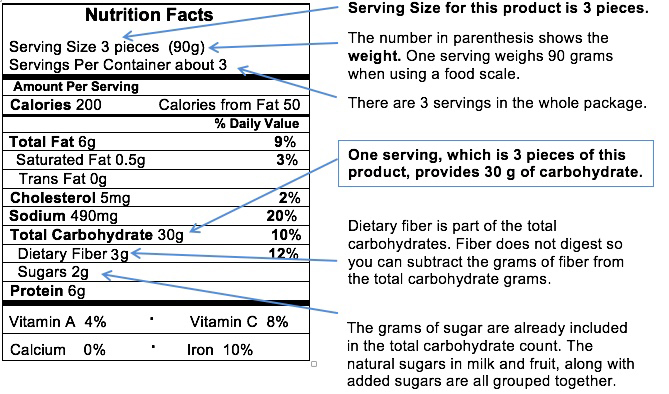
As shown Total Carbohydrates contain Dietary Fibre and Sugars but not only them; and as Fibre and Sugars adding extra detailed information that can be required separately.

Vitamin C and calcium are two essential nutrients for a variety of reasons, but your body needs each for different processes
thus they related but not the same.

In [35]:
Menu.drop("Beverage_category",axis=1,inplace=True)

**3-Data Visualisations**

In [36]:
import matplotlib.pyplot as plt # plotting
import seaborn as sns

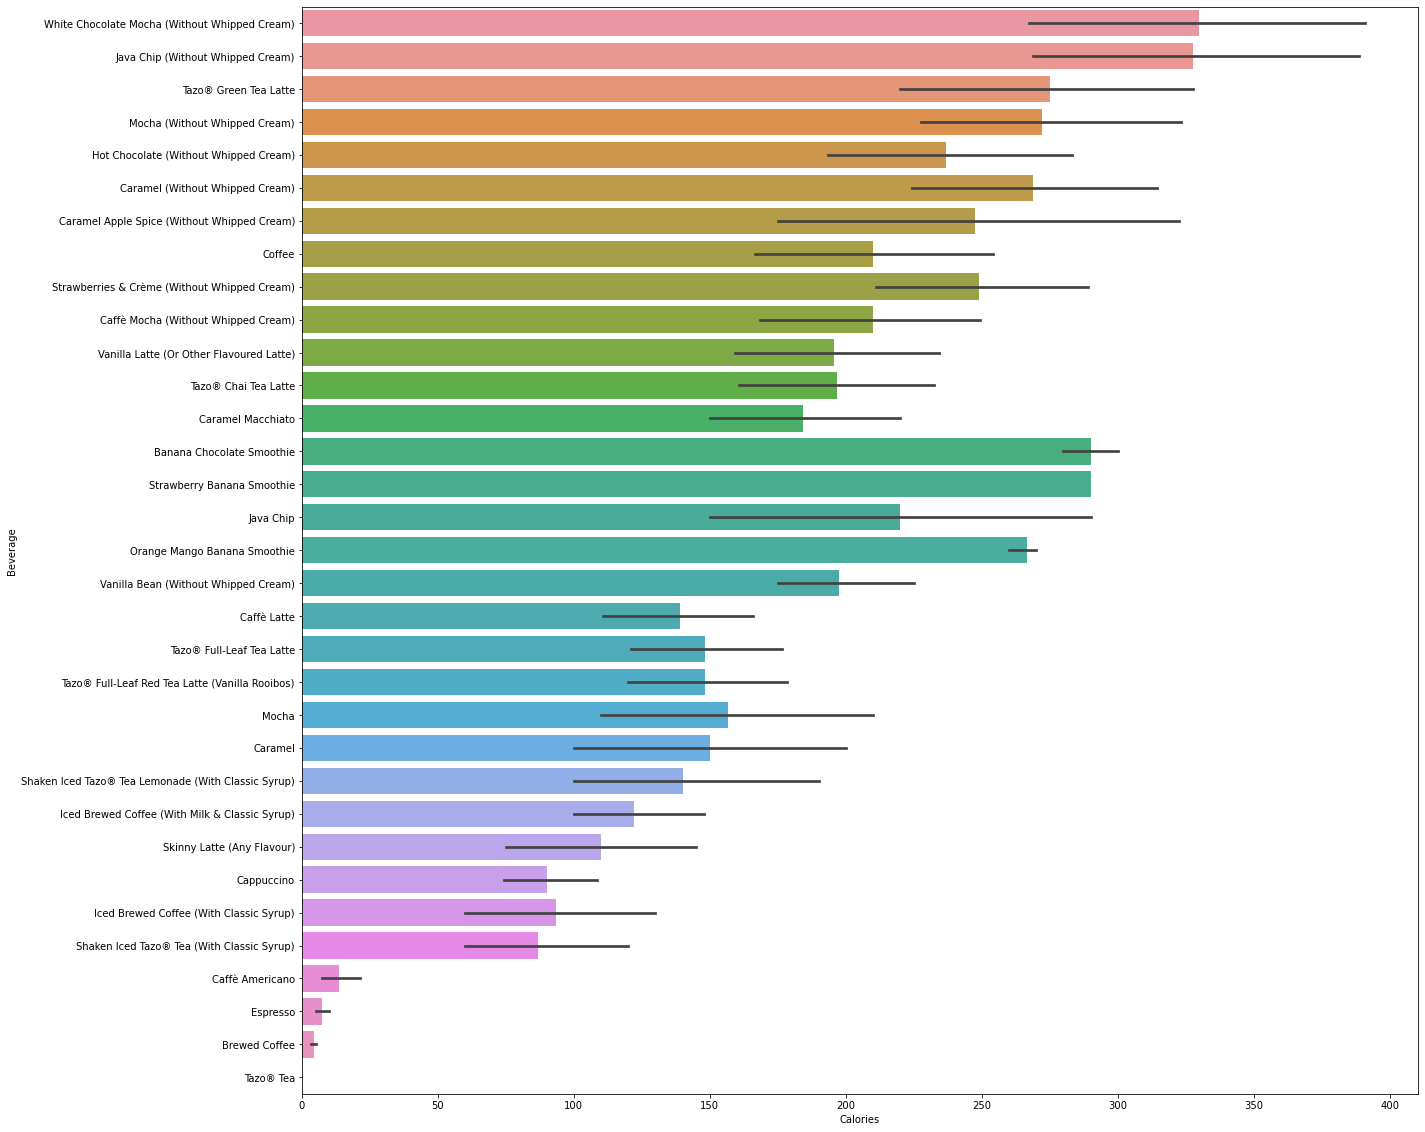

In [37]:
# Q1. Which drink has the highest calories from the dataset?
plt.figure(figsize=(20,20))
# With Sorting data under Highest seen Calories in any drink
sns.barplot(x='Calories',y='Beverage',data=Menu.sort_values("Calories", ascending=False),label="Calories in Drinks")
plt.show()

As shown in previous Graph (with error bar considered too): The Most Calories are in "White Chocolate Mocha (Without Whipped Cream)"

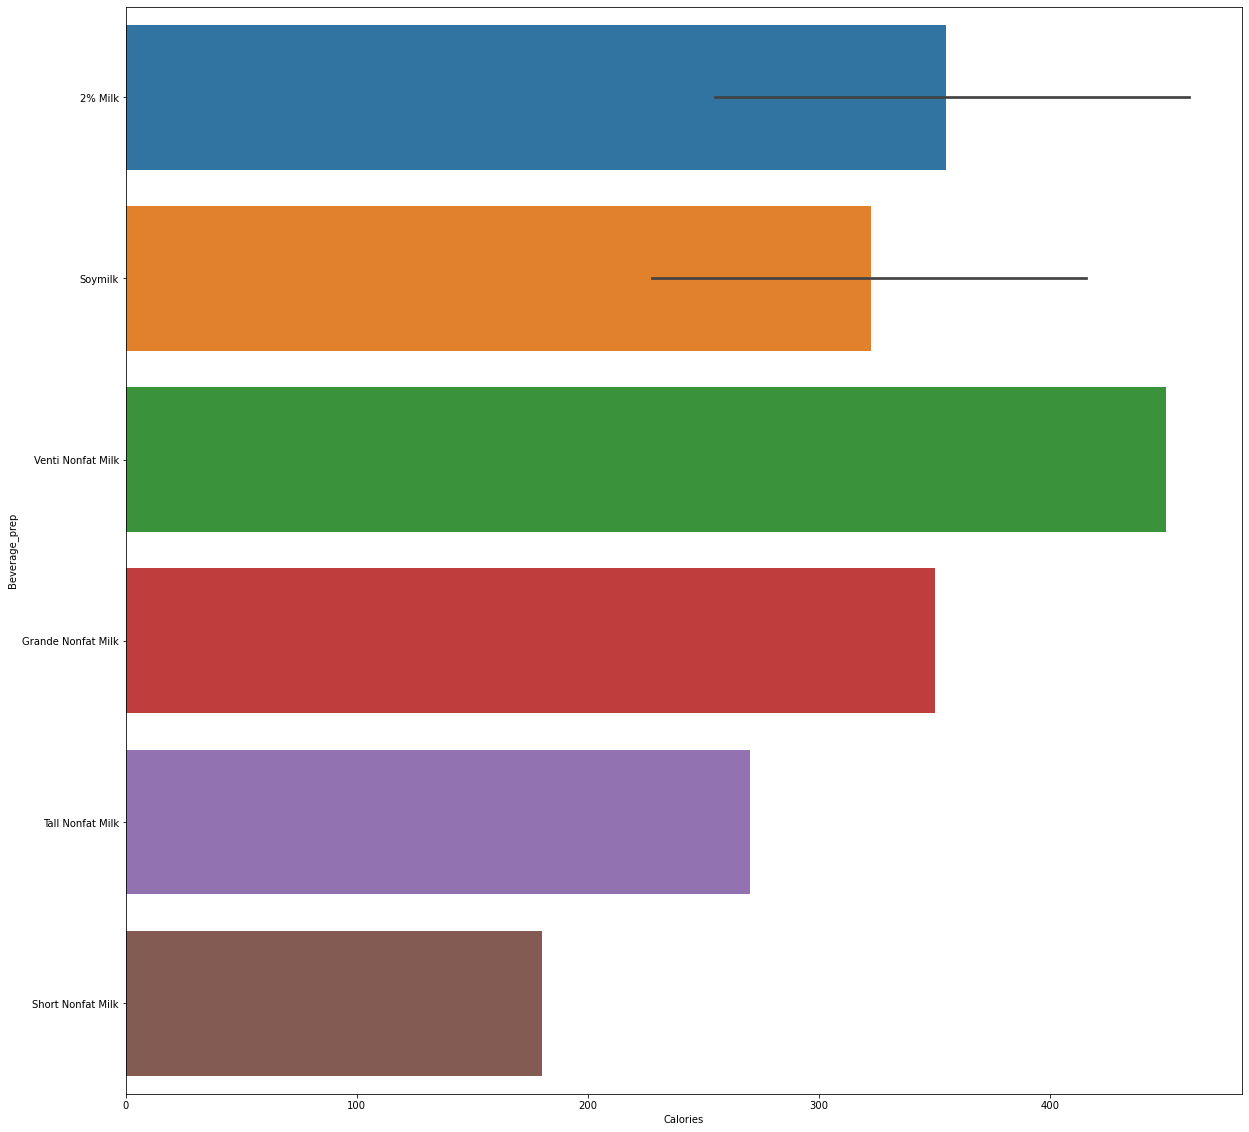

In [38]:
# Which Variant of "White Chocolate Mocha (Without Whipped Cream)" has the highest Calories:
plt.figure(figsize=(20,20))
# With Sorting data under Highest seen Calories in this drink
sns.barplot(x='Calories',y='Beverage_prep',data=Menu.loc[Menu["Beverage"] == "White Chocolate Mocha (Without Whipped Cream)"].sort_values("Calories", ascending=False),label="Calories in Drinks")
plt.show()

From Graph and known Data features: Grande 2% Milk White Chocolate Mocha (Without Whipped Cream) is the highest Calories Drink with 510

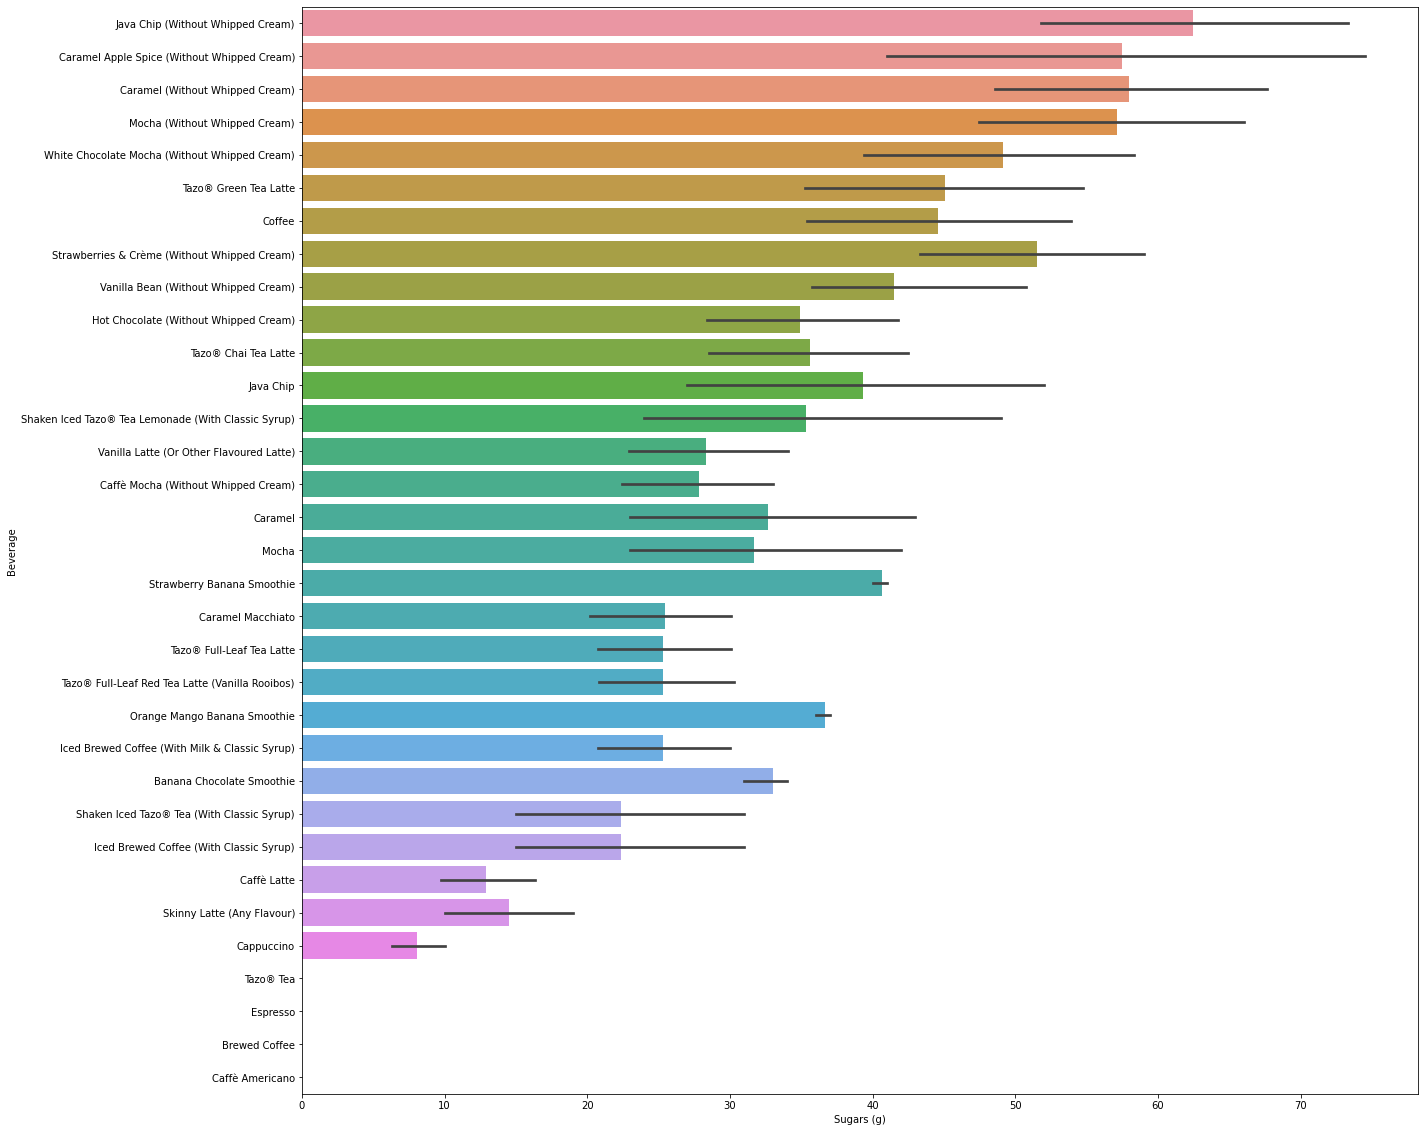

In [39]:
# Q2. Highest Sugar Drink ?
plt.figure(figsize=(20,20))
# With Sorting data under Highest seen Sugars in any drink
sns.barplot(x='Sugars (g)',y='Beverage',data=Menu.sort_values("Sugars (g)", ascending=False),label="Sugars in Drinks")
plt.show()

As shown in previous Graph (Sorted according to highest seen Sugar regardless error bar): The Most Calories are in "Java Chip (Without Whipped Cream)"

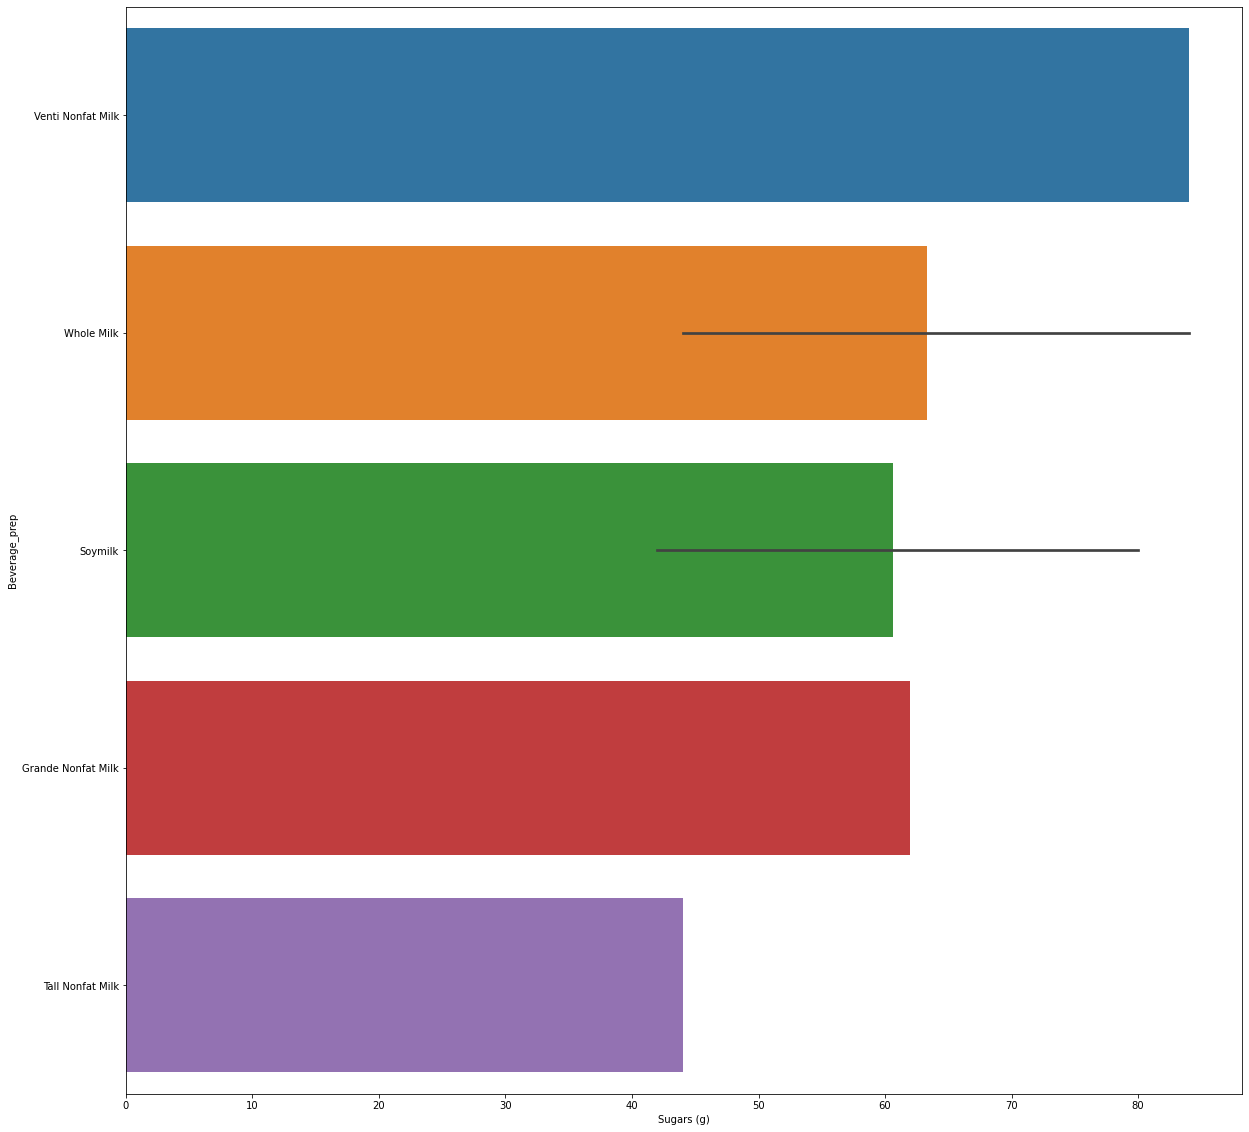

In [40]:
# Which Variant of "Java Chip (Without Whipped Cream)" has the highest Sugars:
plt.figure(figsize=(20,20))
# With Sorting data under Highest seen Sugars in this drink
sns.barplot(x='Sugars (g)',y='Beverage_prep',data=Menu.loc[Menu["Beverage"] == "Java Chip (Without Whipped Cream)"].sort_values("Sugars (g)", ascending=False),label="Sugars in Drinks")
plt.show()

From previous Graph and known Data features: Venti Nonfat Milk Java Chip (Without Whipped Cream) and Venti Whole Milk Java Chip (Without Whipped Cream) are the highest Sugars Drinks with 84g